<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

С помощью параметра Sep, разделили df по "\t".

In [3]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В данном df  23699 строк и 22 столбца, присутствуют значения "NaN" во многих столбцах, нужно разбираться в них, столбцы написаны разным регистром, так же нужно подредактировать столбец со временем.

## Предобработка данных

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Считаем пропуски методом isna() и sum(). 

In [6]:
df[df['ponds_around3000'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


При просмотре столбцов со значениями, заметил закономерность, что в столбцах airports_nearest, cityCenters_nearest 
parks_around3000, parks_nearest, ponds_around3000, ponds_nearest отсутствуют значения, восстановить данные не представляется возможным и удалить их тоже нельзя, оставим без изменения. В balcony - т к отсутствуют данные, томожно предполодить, что значение NaN означает отсутствие балкона, поэтому заменаем его на другое значение "0". Так же и другие значения в столбцах не представляется возможным установить.


In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.7) 

В столбце ceiling_height заменил значения NaN на значение 2,7 метра т к высота потолка определяется по СП 131.13330. Ввиду малой дисперсии в данном параметре, мы можем использовать такой способ обработки пропусков

In [8]:
df['balcony'] = df['balcony'].fillna(0) 

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверяем замену столбца balcony со значениями Nan на "0" т к можно предположить, что отсутствующие значения предполагают отсутствие балкона. Примененяем метод fillna. Остальные пропуски связаны с отсутствием данной категории значений возле квартир и объясняется ленью пользователей вводить данные или не полный (правильный) сбор данных.

In [10]:
df = df.rename(columns={
    'cityCenters_nearest' : 'city_сenters_nearest',
    'parks_around3000' : 'parks_around_3000', 
    'ponds_around3000' : 'ponds_around_3000'})

Переименование столбцов методом rename. Убрали разный регистр в названии столбцов и облегчили читабельность столбцов parks_around_3000, ponds_around_3000.

In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
df = df.dropna(subset = ['floors_total'])

Методом dropna удалили строки со значением NaN

In [13]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_сenters_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [14]:
df['last_price'] = df['last_price'].astype('int')
df['total_area'] = df['total_area'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  int64  
 2   total_area            23613 non-null  int64  
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Меняем тип данных с float64 на int64 в столбце last_price, total_area и floors_total методом astype. Чтобы проще было ориентироваться в стоимости жилья и площади квартиры и этажности.

In [16]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [17]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
23689,13,3550000,35,2018-02-28,1,2.86,15,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000,52,2018-07-19,2,2.70,5,31.0,2,NaN,...,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000,72,2016-10-13,2,2.75,25,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000,30,2017-07-07,1,2.70,5,17.5,4,NaN,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000,62,2016-08-05,3,2.60,9,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59,2018-01-15,3,2.70,5,38.0,4,NaN,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56,2018-02-11,2,2.70,3,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000,32,2017-07-21,1,2.50,5,12.3,1,NaN,...,9.00,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Методом to_datetime() c аргументом format перевели исходный вид даты в нормальный. Часы, минуты и секунды убрались т к были по нулям.

In [18]:
df.duplicated().sum()

0

Дубликатов нет

In [19]:
df['locality_name'].value_counts()

Санкт-Петербург                     15651
посёлок Мурино                        520
посёлок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Ромашки                         1
поселок городского типа Рябово          1
поселок Рабитицы                        1
посёлок Платформа 69-й километр         1
садовое товарищество Новая Ропша        1
Name: locality_name, Length: 364, dtype: int64

В данном разделе мы посчитали пропуски методом isna() и sum(), заменили NaN в столбце balcony на 0, т к отсутствие значения мы приняли за отсутствие балкона, переименовали столбцы методом rename. Убрали разный регистр в названии столбцов и облегчили читабельность столбцов parks_around_3000, ponds_around_3000. Поменяли тип данных с float64 на int64 в столбце last_price, total_area и floors_total методом astype. Чтобы проще было ориентироваться в стоимости жилья и методом to_datetime() c аргументом format перевели исходный вид даты в нормальный и сохранили в тот же столбец. Часы, минуты и секунды убрались т к были по нулям.

## Расчёты и добавление результатов в таблицу

In [20]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')

Разделили стоимость квартиры на общую площать квартиры и применили метод astype.

In [21]:
def number_storeys_def(row1, row2):
    if row1 == 1:
        return 'первый'
    elif row1 == row2:
        return 'последний'
    else:
        return 'другой'

In [22]:
df['number_storeys'] = df.apply(lambda row: number_storeys_def(row['floor'], row['floors_total']), axis=1)

In [23]:
df['number_storeys'].value_counts()

другой       17363
последний     3336
первый        2914
Name: number_storeys, dtype: int64

Написали функцию которая сравнивает два столбца и записывает в новый столбец нужное нам значение, применили метод apply через lambda передали значиние функции и нужные столбцы

In [24]:
df['living_total_area'] = round(df['living_area'] / df['total_area'], 2)

In [25]:
df['kitchen_area_total'] = round(df['kitchen_area'] / df['total_area'], 2)

Добавили price_per_square_meter, number_storeys, living_total_area, kitchen_area_total столбцы в существующую таблицу

## Исследовательский анализ данных

In [26]:
def graf_boxplot(data, column, a, b):
    data[[column]].boxplot()
    plt.ylim(a, b);

Функция, для построения графиков boxplot.

In [27]:
def graf_barplot(data, X, Y, title, xlabel, ylabel):
    sns.barplot(x=X, y=Y, data=data).set(title=title, 
                                         xlabel=xlabel, 
                                         ylabel=ylabel);

Функция, для построения графиков sns.barplot.

In [28]:
def graf_plot(data, X, Y, alpha, title, xlab, ylab):
    data.plot(x=X, y=Y, kind='scatter', alpha=alpha)
    plt.title(title, fontsize=13,  y= 1.1)
    plt.xlabel(xlab, fontsize=13, labelpad=16)
    plt.ylabel(ylab, fontsize=13, labelpad=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13);

Функция, для построения графиков plot.

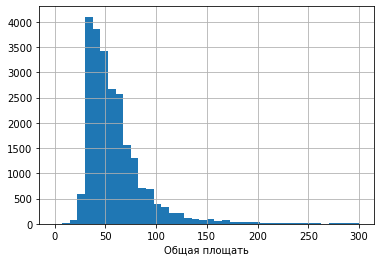

In [29]:
df['total_area'].hist(bins=40, range=(0, 300))
plt.xlabel("Общая площать");

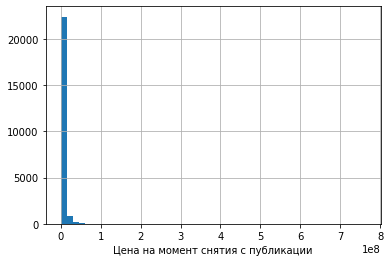

In [30]:
df['last_price'].hist(bins=50)
plt.xlabel("Цена на момент снятия с публикации");

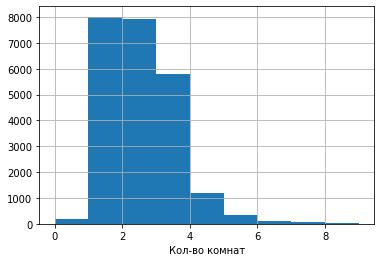

In [31]:
df['rooms'].hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel("Кол-во комнат");

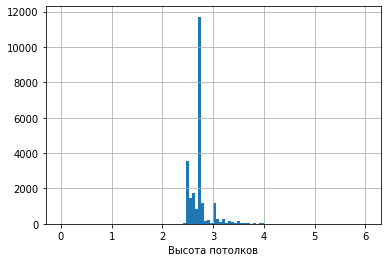

In [32]:
df['ceiling_height'].hist(bins=100, range=(0, 6))
plt.xlabel("Высота потолков");

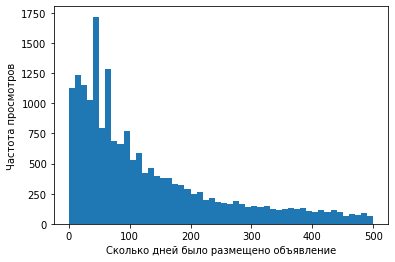

In [33]:
df['days_exposition'].plot(kind='hist', bins=50, range=(0, 500))
plt.xlabel('Cколько дней было размещено объявление')
plt.ylabel('Частота просмотров');

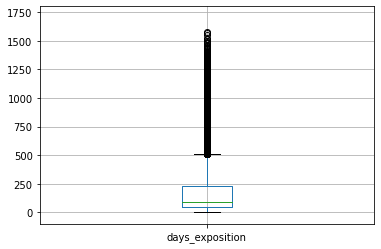

In [34]:
graf_boxplot(df, 'days_exposition', -100, 1800)

In [35]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построили гистрограмму столбца days_exposition, нашли среднее и медиану, медиана почти в два раза меньше среднего, далее построили диаграмму размаха, на ней видно, что нижний ус упирается в 1, а верхний ус упирается в отметку в районе 500 и видно что есть выбросы доходящие до 1580. Исходя из данных, можно сказать что обычно продажа занимает от 45 до 232 дней, очень быстрые продажи будем считать до 45 дней, а необычно долгие которые после 233 дней.

In [36]:
filter_days_exposition = df.query('5 < days_exposition < 500')
filter_days_exposition['days_exposition'].describe()

count    18205.000000
mean       130.376105
std        119.047174
min          6.000000
25%         44.000000
50%         88.000000
75%        185.000000
max        499.000000
Name: days_exposition, dtype: float64

После того как мы убрали редкие и выбивающиеся значения видно, что средняя продолжительность продажи квартир уменьшилась и составляет 130 дней и медиана тоже немного уменьшилась, но не значительно и составляет 88. 

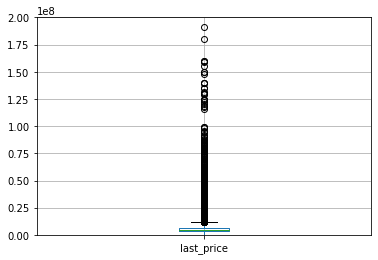

In [37]:
graf_boxplot(df, 'last_price', -100, 200000000)

In [38]:
filter_last_price = df.query('0 < last_price < 10000000')
filter_last_price['last_price'].describe()

count    2.084600e+04
mean     4.632736e+06
std      1.948484e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64

Построили график boxplot. Убрали самые яркие аномалии, ограничились стоимостью квартиры в 10млн руб.

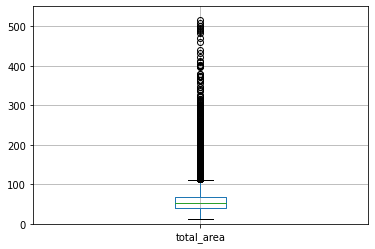

In [39]:
graf_boxplot(df, 'total_area', 0, 550)

In [40]:
filter_total_area = df.query('0 < total_area < 100')
filter_total_area['total_area'].describe()

count    21717.000000
mean        52.544550
std         17.356931
min         12.000000
25%         39.000000
50%         49.000000
75%         64.000000
max         99.000000
Name: total_area, dtype: float64

Построили график boxplot. Убрали самые яркие аномалии, ограничились площадью квартиры до 100м2.

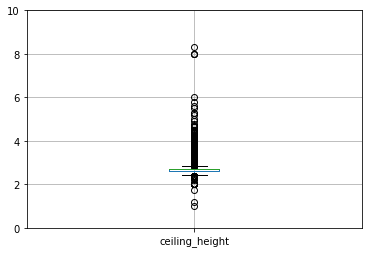

In [41]:
graf_boxplot(df, 'ceiling_height', 0, 10)

In [42]:
filter_ceiling_height = df.query('0 < ceiling_height < 3')
filter_ceiling_height['ceiling_height'].describe()

count    20973.00000
mean         2.65549
std          0.09722
min          1.00000
25%          2.60000
50%          2.70000
75%          2.70000
max          2.99000
Name: ceiling_height, dtype: float64

Построили график boxplot. Убрали самые яркие аномалии, ограничились высотой потолка в 3м.

In [43]:
df = df.query('0 < total_area < 100')
df['total_area'].describe()

count    21717.000000
mean        52.544550
std         17.356931
min         12.000000
25%         39.000000
50%         49.000000
75%         64.000000
max         99.000000
Name: total_area, dtype: float64

In [44]:
df.sample(n = 20, replace = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,number_storeys,living_total_area,kitchen_area_total
18899,14,8700000,60,2017-10-26,2,2.70,6,31.2,4,NaN,...,5026.0,1.0,428.0,1.0,407.0,55.0,145000,другой,0.52,0.19
12981,4,3398000,37,2016-04-12,1,2.70,17,16.3,16,False,...,14883.0,0.0,NaN,0.0,NaN,67.0,91837,другой,0.44,0.24
21654,9,3600000,31,2018-11-12,1,2.55,9,16.0,9,NaN,...,6940.0,1.0,420.0,0.0,NaN,21.0,116129,последний,0.52,0.23
2983,9,20370000,93,2016-06-30,2,3.00,8,41.2,6,NaN,...,4243.0,1.0,271.0,0.0,NaN,NaN,219032,другой,0.44,0.28
5350,14,4450000,42,2019-02-14,2,2.50,5,28.1,1,NaN,...,12283.0,1.0,566.0,1.0,848.0,NaN,105952,первый,0.67,0.12
11940,8,4700000,35,2018-07-21,1,2.50,23,22.0,12,NaN,...,14065.0,0.0,NaN,0.0,NaN,37.0,134285,другой,0.63,0.37
18846,8,1000000,36,2017-06-08,1,2.55,5,17.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,201.0,27777,другой,0.47,0.25
20198,15,4000000,45,2015-12-25,2,2.70,5,30.0,1,False,...,11976.0,0.0,NaN,0.0,NaN,232.0,88888,первый,0.67,0.18
8258,4,5602774,81,2017-03-21,3,2.75,23,45.6,13,NaN,...,17405.0,0.0,NaN,1.0,274.0,371.0,69170,другой,0.56,0.19
14355,10,7700000,59,2016-12-19,2,2.70,6,37.1,3,NaN,...,4222.0,0.0,NaN,1.0,909.0,436.0,130508,другой,0.63,0.16


Удалил выбросы в df в total_area

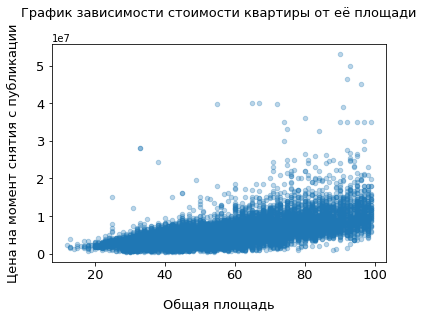

In [45]:
graf_plot(df, 
          'total_area', 
          'last_price', 
           0.3, 
          'График зависимости стоимости квартиры от её площади', 
          'Общая площадь',
          'Цена на момент снятия с публикации')

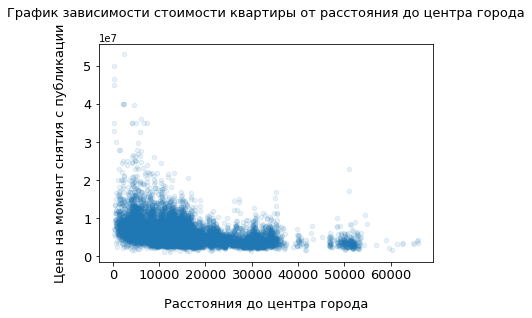

In [46]:
graf_plot(df, 
          'city_сenters_nearest', 
          'last_price', 
           0.1, 
          'График зависимости стоимости квартиры от расстояния до центра города', 
          'Расстояния до центра города',
          'Цена на момент снятия с публикации')

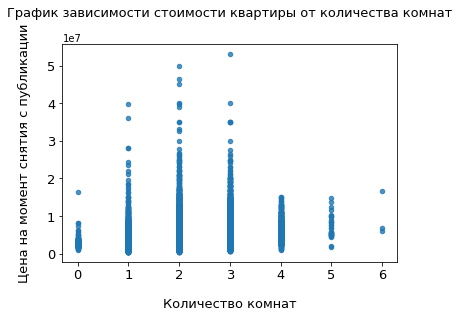

In [47]:
graf_plot(df, 
          'rooms', 
          'last_price', 
           0.8, 
          'График зависимости стоимости квартиры от количества комнат', 
          'Количество комнат',
          'Цена на момент снятия с публикации')

Из графиков видно, что чем больше площадь, тем выше стоимость, чем ближе центр, тем выше стоимость, чем больше комнат, тем выше стоимость, но до определенного момента.

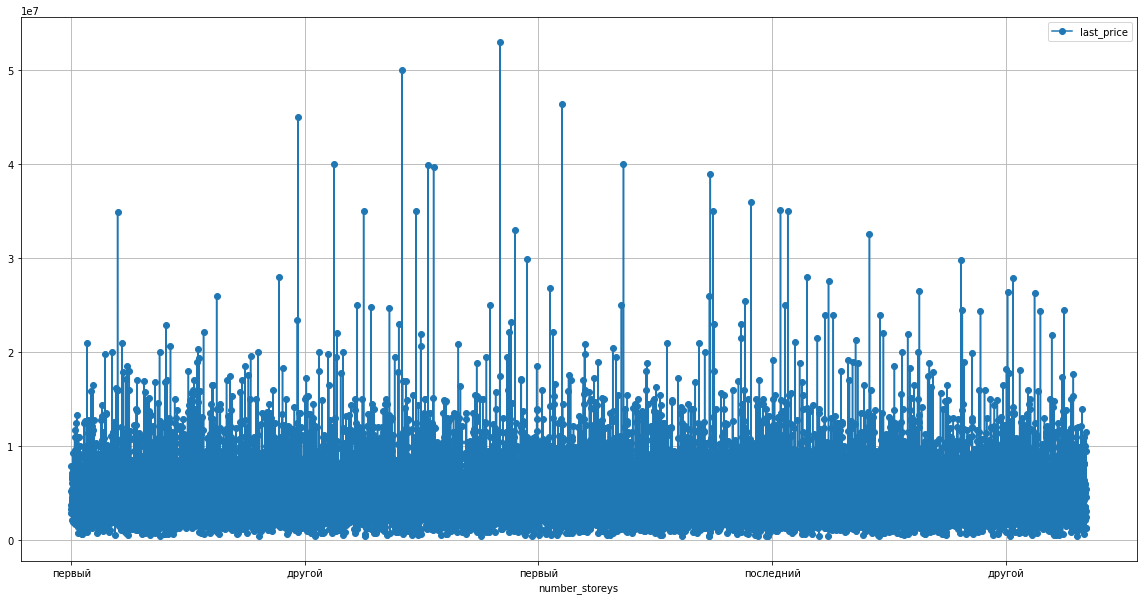

In [48]:
df.plot(x='number_storeys', y='last_price', style='o-', grid=True, figsize=(20, 10));

In [49]:
df['price_floor'] = round(df['last_price'] / df['floor'], 2)

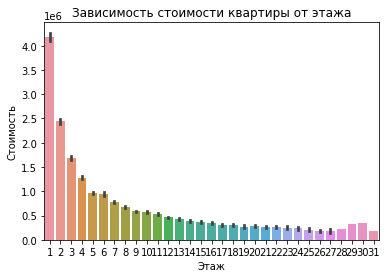

In [50]:
graf_barplot(df, 
             'floor', 
             'price_floor', 
             'Зависимость стоимости квартиры от этажа', 
             'Этаж', 
             'Стоимость')

Посчитал цену для каждого этажа и построил график barplot, из него видно, что лидирующию позицию по стоимости занимает первый этаж, так же видно что по седьмой этаж, стоимость довольно таки высока, чем выше этаж, тем он дешевле.

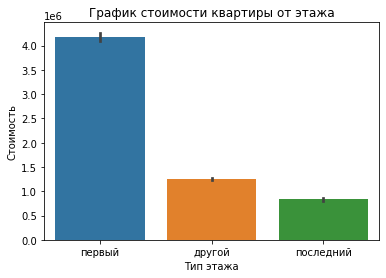

In [51]:
graf_barplot(df, 
             'number_storeys', 
             'price_floor', 
             'График стоимости квартиры от этажа', 
             'Тип этажа', 
             'Стоимость')

Из графика видно, что цены на первом  сильно отличаются от цен на других этажах, как вариант, тем, что люди выкупают первые этажи под инвестиции(аренда, магазины).

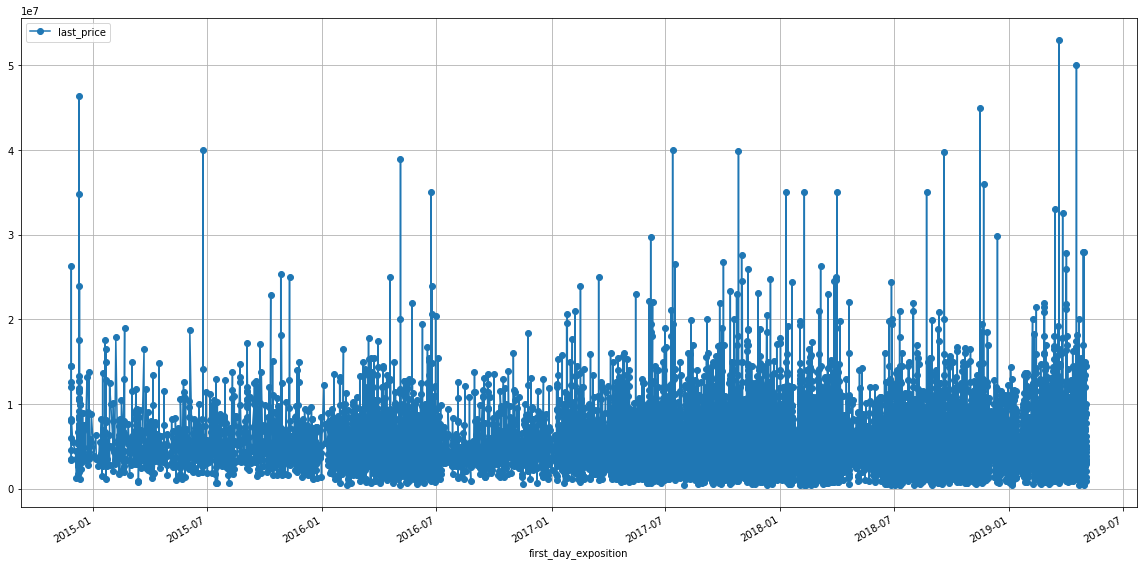

In [52]:
df.plot(x='first_day_exposition', y='last_price', style='o-', grid=True, figsize=(20, 10));

Из графика видно, что со временем, стоимость на квартиры растёт. Есть некоторые просадки по стоимости на квартиры, хотя это скорее всего связанно с городом, где распологается квартира.

In [53]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,number_storeys,living_total_area,kitchen_area_total,price_floor
1,7,3350000,40,2018-12-04,1,2.7,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,83750,первый,0.46,0.28,3350000.00
2,10,5196000,56,2015-08-20,2,2.7,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785,другой,0.61,0.15,1299000.00
5,10,2890000,30,2018-09-10,1,2.7,12,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55.0,96333,другой,0.48,0.30,578000.00
6,6,3700000,37,2017-11-02,1,2.7,26,10.6,6,NaN,...,0.0,NaN,0.0,NaN,155.0,100000,другой,0.29,0.39,616666.67
7,5,7915000,71,2019-04-18,2,2.7,24,NaN,22,NaN,...,0.0,NaN,0.0,NaN,NaN,111478,другой,NaN,0.27,359772.73


In [54]:
df['year'] = df.first_day_exposition.dt.year
df['month'] = df.first_day_exposition.dt.month
df['day'] = df.first_day_exposition.dt.day
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,number_storeys,living_total_area,kitchen_area_total,price_floor,year,month,day
1,7,3350000,40,2018-12-04,1,2.7,11,18.6,1,NaN,...,NaN,81.0,83750,первый,0.46,0.28,3350000.00,2018,12,4
2,10,5196000,56,2015-08-20,2,2.7,5,34.3,4,NaN,...,574.0,558.0,92785,другой,0.61,0.15,1299000.00,2015,8,20
5,10,2890000,30,2018-09-10,1,2.7,12,14.4,5,NaN,...,NaN,55.0,96333,другой,0.48,0.30,578000.00,2018,9,10
6,6,3700000,37,2017-11-02,1,2.7,26,10.6,6,NaN,...,NaN,155.0,100000,другой,0.29,0.39,616666.67,2017,11,2
7,5,7915000,71,2019-04-18,2,2.7,24,NaN,22,NaN,...,NaN,NaN,111478,другой,NaN,0.27,359772.73,2019,4,18


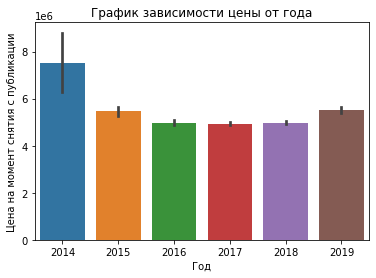

In [55]:
graf_barplot(df, 
             'year', 
             'last_price', 
             'График зависимости цены от года', 
             'Год', 
             'Цена на момент снятия с публикации')

По графику видно, что стоимость квартир из года в год падала,но с 2018 года она начала расти

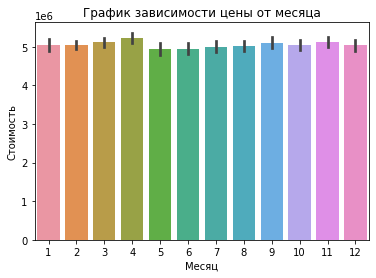

In [56]:
graf_barplot(df, 
             'month', 
             'last_price', 
             'График зависимости цены от месяца', 
             'Месяц', 
             'Стоимость')

По построенному графику видно, что нет месяца который бы существенно отличался от других, видно, что после нового год стоимость падает, но потом всё равно немного растет.

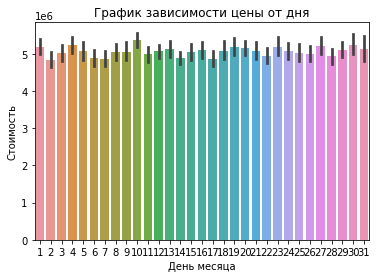

In [57]:
graf_barplot(df, 
             'day', 
             'last_price', 
             'График зависимости цены от дня', 
             'День месяца', 
             'Стоимость')

Разделил столбец с датой, на раздельные столбцы: год, месяц, день. Так же построили графики по этим трем столбцам со стоимостью квартир.

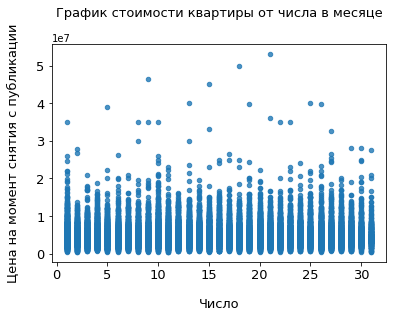

In [58]:
graf_plot(df, 
          'day', 
          'last_price', 
           0.8, 
          'График стоимости квартиры от числа в месяце', 
          'Число',
          'Цена на момент снятия с публикации')

In [59]:
df['day'].corr(df['last_price'])

0.0032678247378685296

Из корреляции видно, что стоимости от дня практически не зависит, линейная связь слабая, практически нет.

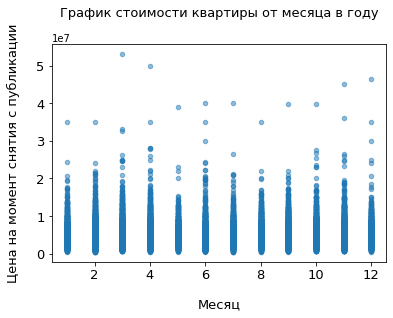

In [60]:
graf_plot(df, 
          'month', 
          'last_price', 
           0.5, 
          'График стоимости квартиры от месяца в году', 
          'Месяц',
          'Цена на момент снятия с публикации')

In [61]:
df['month'].corr(df['last_price'])

-0.0018373205996083607

Из корреляции видно, что стоимость от месяца практически не зависит, линейная связь слабая, практически нет.

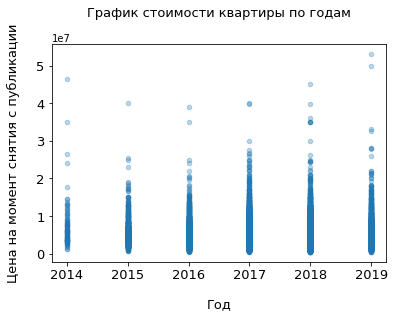

In [62]:
graf_plot(df, 
          'year', 
          'last_price', 
           0.3, 
          'График стоимости квартиры по годам', 
          'Год',
          'Цена на момент снятия с публикации')

In [63]:
df['year'].corr(df['last_price'])

0.006608388289594818

Из корреляции видно, что стоимость от года слабо зависит, линейная связь слабая, но больше чем у дня и месяца.

In [64]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,living_total_area,kitchen_area_total,price_floor,year,month,day
total_images,1.000000,0.160136,0.124207,0.090705,-0.004109,0.015025,0.103664,0.034596,-0.028073,-0.023563,...,-0.020537,-0.000011,-0.038187,0.124257,0.004900,-0.027457,0.045210,0.146855,0.004284,0.006925
last_price,0.160136,1.000000,0.649026,0.355217,0.073670,0.136308,0.512257,0.101634,-0.055724,-0.037645,...,0.196323,-0.085691,0.081032,0.757895,-0.014892,-0.046604,0.448687,0.006608,-0.001837,0.003268
total_area,0.124207,0.649026,1.000000,0.787511,0.042079,-0.022283,0.897250,-0.024188,-0.118224,-0.071702,...,0.118639,-0.049089,0.108122,0.061788,0.220579,-0.392902,0.349520,-0.049096,0.003722,-0.001886
rooms,0.090705,0.355217,0.787511,1.000000,0.006922,-0.232420,0.885107,-0.174372,-0.173525,-0.105757,...,0.029069,-0.012064,0.071867,-0.147126,0.554948,-0.647069,0.286411,-0.024522,-0.004717,0.003579
ceiling_height,-0.004109,0.073670,0.042079,0.006922,1.000000,-0.011869,0.035100,-0.004423,0.002311,0.019594,...,0.055206,-0.042052,0.004059,0.100845,0.002132,0.025437,0.044374,0.001368,-0.001643,0.000821
floors_total,0.015025,0.136308,-0.022283,-0.232420,-0.011869,1.000000,-0.182909,0.676311,0.071319,0.052947,...,-0.105770,0.028240,-0.041607,0.252737,-0.373660,0.368163,-0.275701,0.000902,0.013617,-0.002038
living_area,0.103664,0.512257,0.897250,0.885107,0.035100,-0.182909,1.000000,-0.137170,-0.075152,-0.043096,...,0.081296,-0.030092,0.089405,-0.050100,0.607385,-0.628349,0.345965,-0.034993,-0.006849,0.003218
floor,0.034596,0.101634,-0.024188,-0.174372,-0.004423,0.676311,-0.137170,1.000000,0.036859,0.037937,...,-0.068371,0.026924,-0.036916,0.189541,-0.268614,0.262866,-0.515574,0.002495,0.019498,0.005467
studio,-0.028073,-0.055724,-0.118224,-0.173525,0.002311,0.071319,-0.075152,0.036859,1.000000,-0.004508,...,0.004312,-0.000667,-0.020023,0.032450,0.097074,NaN,-0.037483,0.009743,-0.000515,-0.012457
open_plan,-0.023563,-0.037645,-0.071702,-0.105757,0.019594,0.052947,-0.043096,0.037937,-0.004508,1.000000,...,0.008057,-0.003543,-0.023393,0.011583,0.066922,NaN,-0.027594,-0.023509,0.027890,0.002556


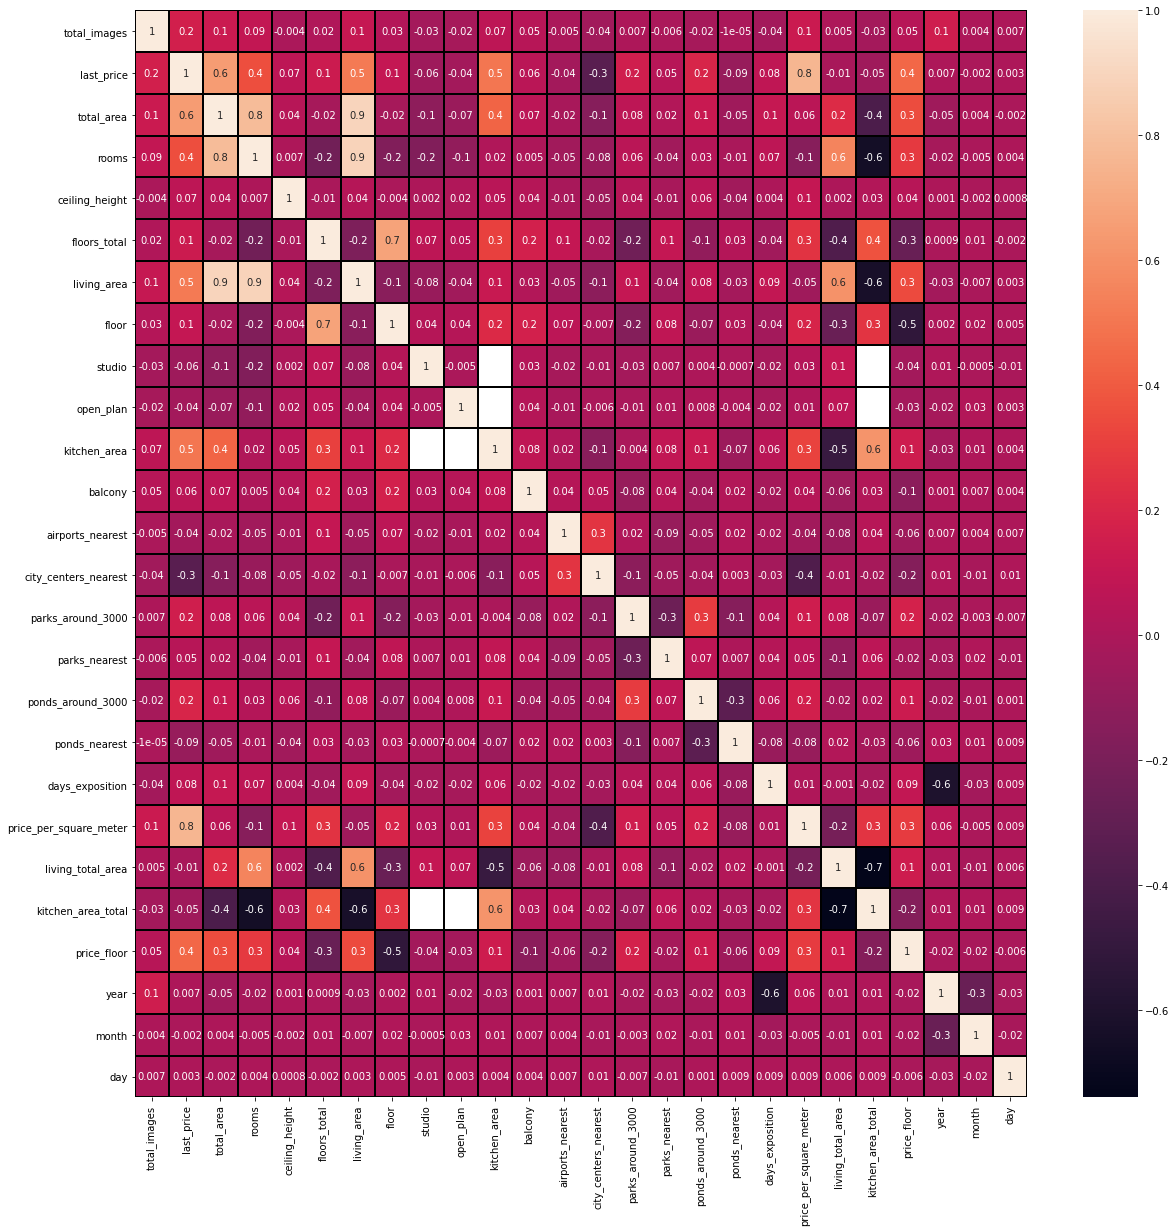

In [65]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),linewidths=1, linecolor='black',annot = True, fmt='.1g');

Посчитал корреляцию для всего df и визуализировал ее.

In [66]:
spb_mean = df.pivot_table(index = 'locality_name', values='price_per_square_meter', aggfunc=['count','mean'])

In [67]:
spb_mean.columns = ['count', 'mean']

In [68]:
spb_mean.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13926,110457.374623
посёлок Мурино,520,86298.390385
посёлок Шушары,430,79056.400000
Всеволожск,391,68895.639386
Пушкин,338,101684.937870
Колпино,332,75636.972892
посёлок Парголово,324,90998.228395
Гатчина,301,69241.857143
деревня Кудрово,297,92920.279461


Самая высокая стоимость в Санкт-Петербурге, самая низкая стоимость в Выборге.

In [69]:
spb_mean_graf = df.pivot_table(index = 'locality_name', values='price_per_square_meter', aggfunc='mean')

In [70]:
spb_mean_graf.columns = ['mean']

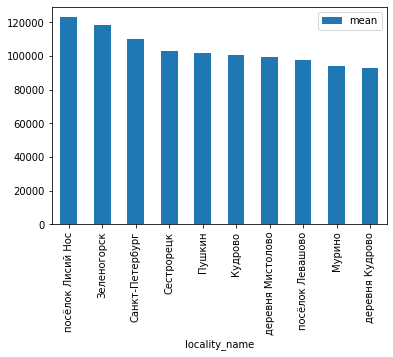

In [71]:
spb_mean_graf.sort_values(by='mean', ascending=False).head(10).plot(kind = 'bar');

Из графика видно, что СПБ занимает 3-е место по стоимости квартир, первые два места, это занимают города с элитной недвижимостью.

In [72]:
df['city_сenters_nearest_km'] = df['city_сenters_nearest'] / 1000

In [73]:
apartments_spb = df[df['locality_name'] == 'Санкт-Петербург']

In [74]:
apartments_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_square_meter,number_storeys,living_total_area,kitchen_area_total,price_floor,year,month,day,city_сenters_nearest_km
2,10,5196000,56,2015-08-20,2,2.70,5,34.3,4,NaN,...,558.0,92785,другой,0.61,0.15,1299000.00,2015,8,20,13.933
7,5,7915000,71,2019-04-18,2,2.70,24,NaN,22,NaN,...,NaN,111478,другой,NaN,0.27,359772.73,2019,4,18,11.634
9,18,5400000,61,2017-02-26,3,2.50,9,43.6,7,NaN,...,289.0,88524,другой,0.71,0.11,771428.57,2017,2,26,15.008
10,5,5050000,39,2017-11-16,1,2.67,12,20.3,3,NaN,...,137.0,129487,другой,0.52,0.22,1683333.33,2017,11,16,13.878
15,16,4650000,39,2017-11-18,1,2.70,14,20.5,5,NaN,...,19.0,119230,другой,0.53,0.19,930000.00,2017,11,18,14.259


Создали новый столбец city_сenters_nearest_km в котором записали расстояние в км, поделив расстояние до центра на 1000. Выбрали только те строки, которые принадлежат Санкт-Петербургу

In [75]:
apartments_spb = apartments_spb.dropna(subset = ['city_сenters_nearest_km'])

In [76]:
apartments_spb.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                  944
floor                          0
is_apartment               12264
studio                         0
open_plan                      0
kitchen_area                1183
balcony                        0
locality_name                  0
airports_nearest              15
city_сenters_nearest           0
parks_around_3000              0
parks_nearest               7731
ponds_around_3000              0
ponds_nearest               7036
days_exposition             1633
price_per_square_meter         0
number_storeys                 0
living_total_area            944
kitchen_area_total          1183
price_floor                    0
year                           0
month                          0
day                            0
city_сente

In [77]:
apartments_spb['city_сenters_nearest_km'] = apartments_spb['city_сenters_nearest_km'].astype('int')

In [78]:
apartments_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13882 entries, 2 to 23697
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             13882 non-null  int64         
 1   last_price               13882 non-null  int64         
 2   total_area               13882 non-null  int64         
 3   first_day_exposition     13882 non-null  datetime64[ns]
 4   rooms                    13882 non-null  int64         
 5   ceiling_height           13882 non-null  float64       
 6   floors_total             13882 non-null  int64         
 7   living_area              12938 non-null  float64       
 8   floor                    13882 non-null  int64         
 9   is_apartment             1618 non-null   object        
 10  studio                   13882 non-null  bool          
 11  open_plan                13882 non-null  bool          
 12  kitchen_area             12699 n

In [79]:
apartments_spb['average_price_km'] = apartments_spb['last_price'] // apartments_spb['city_сenters_nearest_km']

In [80]:
apartments_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_square_meter,number_storeys,living_total_area,kitchen_area_total,price_floor,year,month,day,city_сenters_nearest_km,average_price_km
2,10,5196000,56,2015-08-20,2,2.70,5,34.3,4,NaN,...,92785,другой,0.61,0.15,1299000.00,2015,8,20,13,399692.0
7,5,7915000,71,2019-04-18,2,2.70,24,NaN,22,NaN,...,111478,другой,NaN,0.27,359772.73,2019,4,18,11,719545.0
9,18,5400000,61,2017-02-26,3,2.50,9,43.6,7,NaN,...,88524,другой,0.71,0.11,771428.57,2017,2,26,15,360000.0
10,5,5050000,39,2017-11-16,1,2.67,12,20.3,3,NaN,...,129487,другой,0.52,0.22,1683333.33,2017,11,16,13,388461.0
15,16,4650000,39,2017-11-18,1,2.70,14,20.5,5,NaN,...,119230,другой,0.53,0.19,930000.00,2017,11,18,14,332142.0


Посмотрели наличие NaN в нужных нам столбцах, поменяли формат столбца на int, разделили стоимость квартиры на километраж (деление без остатка, чтобы избавиться от ненужных нам хвостов)

In [81]:
data_pivot = apartments_spb.pivot_table(columns='city_сenters_nearest_km', values='last_price', aggfunc='mean')
data_pivot

city_сenters_nearest_km,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
last_price,1.282908e+07,9.709171e+06,9.219604e+06,7.902963e+06,8.917641e+06,8.320981e+06,7.939906e+06,7.769537e+06,6.770640e+06,5.633394e+06,...,6167648.65,5.056721e+06,5.022707e+06,4.126867e+06,3862235.0,3.988487e+06,3575000.0,8300000.0,4.611667e+06,3.833333e+06


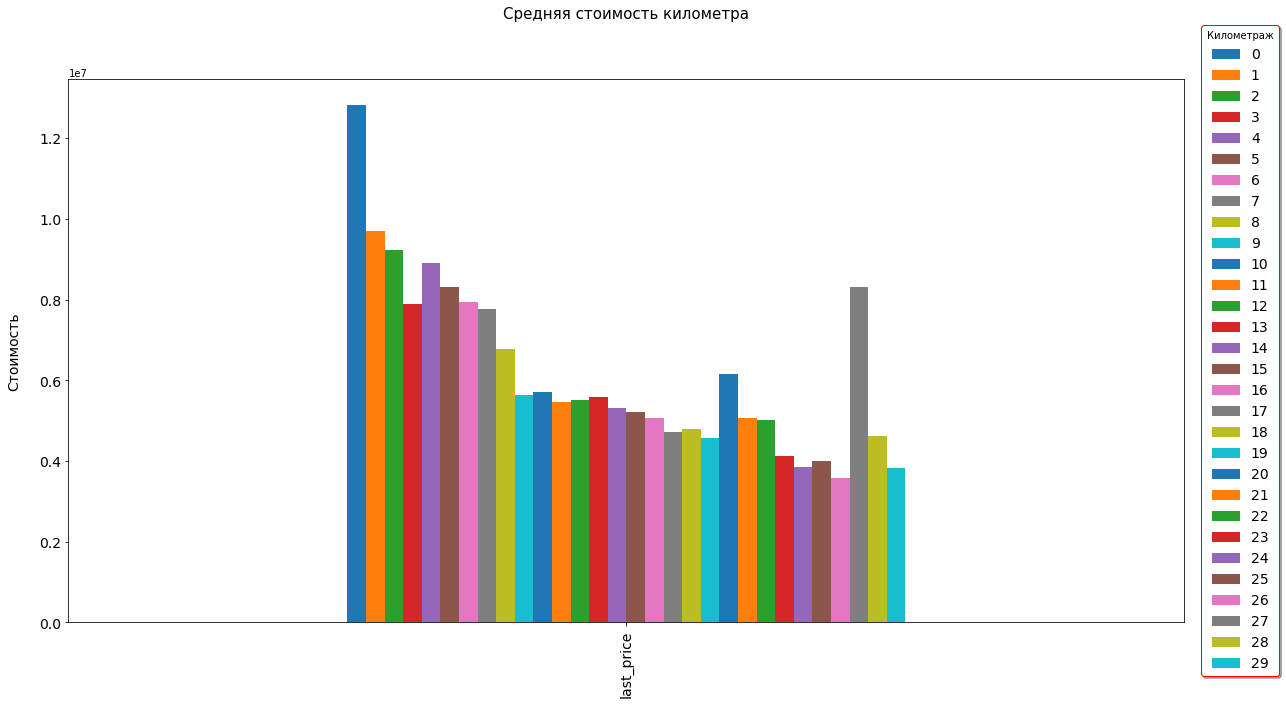

In [82]:
data_pivot.plot(kind = 'bar', figsize=(20, 10))
plt.title('Средняя стоимость километра', fontsize=15,  y= 1.1)
plt.ylabel('Стоимость', fontsize=14, labelpad=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, 
           shadow=True, 
           framealpha=1, 
           edgecolor='r', 
           title='Километраж', 
           loc='center', 
           bbox_to_anchor=(1.05, 0.50));

Рассчитал среднюю цену для каждого километра и построил график зависимости средней цены от километража. Из графика понятно, что 1 по 7 километр относится к центру города.

In [83]:
apartments_spb_center_10 = apartments_spb[apartments_spb['city_сenters_nearest_km'] <= 7]

In [84]:
apartments_spb_center_10 = apartments_spb_center_10[['last_price', 'total_area', 'rooms', 'ceiling_height']]

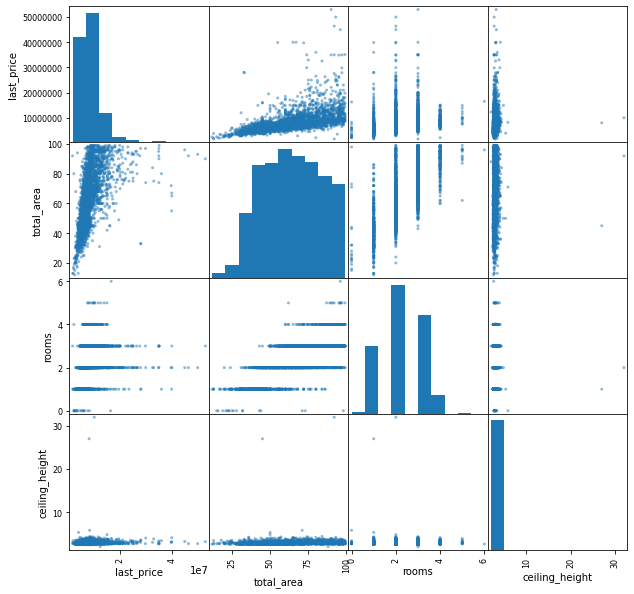

In [85]:
pd.plotting.scatter_matrix(apartments_spb_center_10, figsize=(10, 10));

In [86]:
apartments_spb_center_10['last_price'].corr(apartments_spb_center_10['total_area'])

0.5379986901479407

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связь присутствует и довольно не плохая.

In [87]:
apartments_spb_center_10['last_price'].corr(apartments_spb_center_10['rooms'])

0.22024889977941478

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связь присутствует, но она слабее чем связь между ценой и общей площадью

In [88]:
apartments_spb_center_10['last_price'].corr(apartments_spb_center_10['ceiling_height'])

0.060975353390583756

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связь присутствует, но она очень слабая, почти нет

In [89]:
factors_cost_apartment = df[['last_price', 'floor', 'rooms', 'city_сenters_nearest_km', 'days_exposition']]

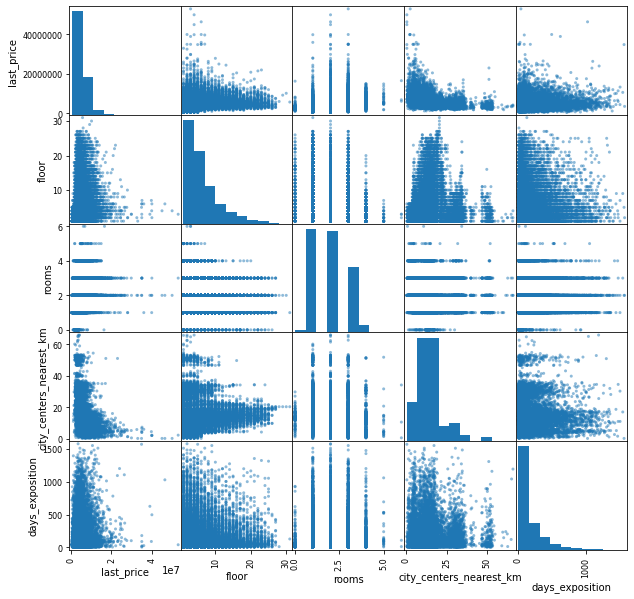

In [90]:
pd.plotting.scatter_matrix(factors_cost_apartment, figsize=(10, 10));

По матрице видно, чем больше площадь, тем выше стоимость квартиры,так же с кол-вом комнат растет и цена на квартиру, хотя есть пик, после которого, чем больше комнат, тем дешевле становится квартира. На счет высоты потолков, сильного роста цен нет, так же квартира с одной высотой потолка, может стоить совершенно по разному. На стоимость квартиры так же влияет этаж, на котором она располагается, люди чаще покупают квартиры на более низких этажах, чем на высоких, так же люди стараются покупать квартиры, не очень далеко от центра.

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связь присутствует и она больше чем у этажности, километража и сколько дней было размещено объявление

In [91]:
factors_cost_apartment['last_price'].corr(factors_cost_apartment['floor'])

0.10163354206941169

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связь присутствует но она слабая.

In [92]:
factors_cost_apartment['last_price'].corr(factors_cost_apartment['city_сenters_nearest_km'])

-0.3364798309056331

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связи практически нет.

In [93]:
factors_cost_apartment['last_price'].corr(factors_cost_apartment['days_exposition'])

0.08103207234788529

Рассчитал коэффициент корреляции Пирсона. Из него видно, что линейная связи практически нет.

## Общий вывод

Сначала мы познакомились с данными, которыми нам предстоит работать, обработали данные, различными методами, заменили типы данных, заполнили некоторые пропуски в данных, а где-то их попросту удалили. Добавили новые столбцы : цена квадратного метра; день недели, месяц и год публикации объявления (мы сохранили в текущий столбец); этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.
К сожалению, у нас есть не все данные, некоторые из них отсутствуют, по разным видам причин, вот некоторые из них: обычная лень пользователям указывать все данные, техническая ошибка, не правильный сбор данных. По данным которые у нас имеются, построили графики, написали промежуточные выводы. Всё же есть ключевые особенности квартир, из которых и вытекает высокая её стоимость, а именно : удаленность от центра(люди стараются покупать квартиры ближе к центру, поэтому и цена на них будет выше), этаж(так же влияет на стоимость квартир, люди стараюся поселиться не на слишком высоком этаже, частично это связано с бизнесом(на первых этажах магазины и тд)), площадь(самые ходовые квартиры в СПБ площадью до 300м2), число комнат(самые ходовые квартиры, число комнат в которых не превышает 6) и за какой срок была продана квартира (чем дольше квартира находится на сайте, тем за меньшую цену будет заключена сделка).